<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import BisectingKMeans

df=pd.read_csv('sample.csv')

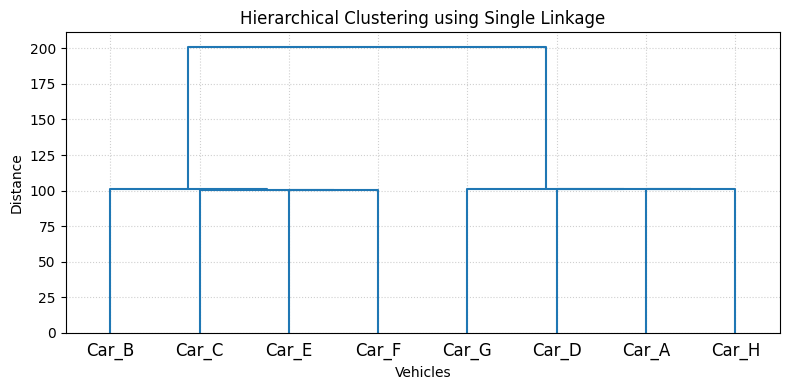

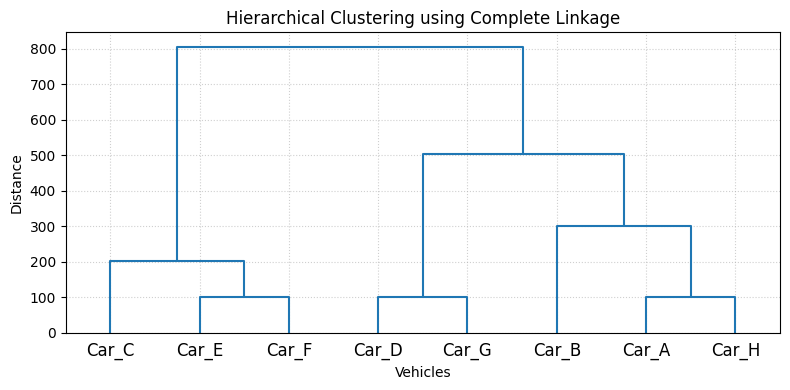

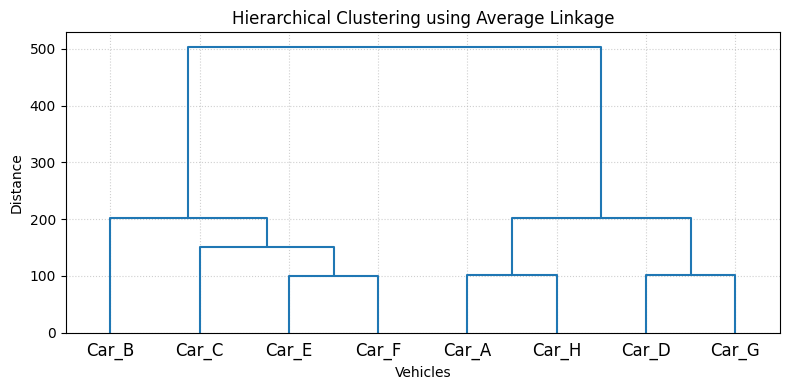

In [4]:
# Features for clustering
X = df.iloc[:, 1:]

# Hierarchical Clustering with different linkage methods
methods = ['single', 'complete', 'average']
for m in methods:
    plt.figure(figsize=(8, 4))
    dendrogram(linkage(X, method=m), labels=df['Vehicle'].values, color_threshold=0.5)
    plt.title(f'Hierarchical Clustering using {m.capitalize()} Linkage')
    plt.xlabel('Vehicles')
    plt.ylabel('Distance')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [5]:
# Divisive (Bisecting K-Means) Clustering
model = BisectingKMeans(n_clusters=3, random_state=42)
labels = model.fit_predict(X)
df['Divisive_Cluster'] = labels

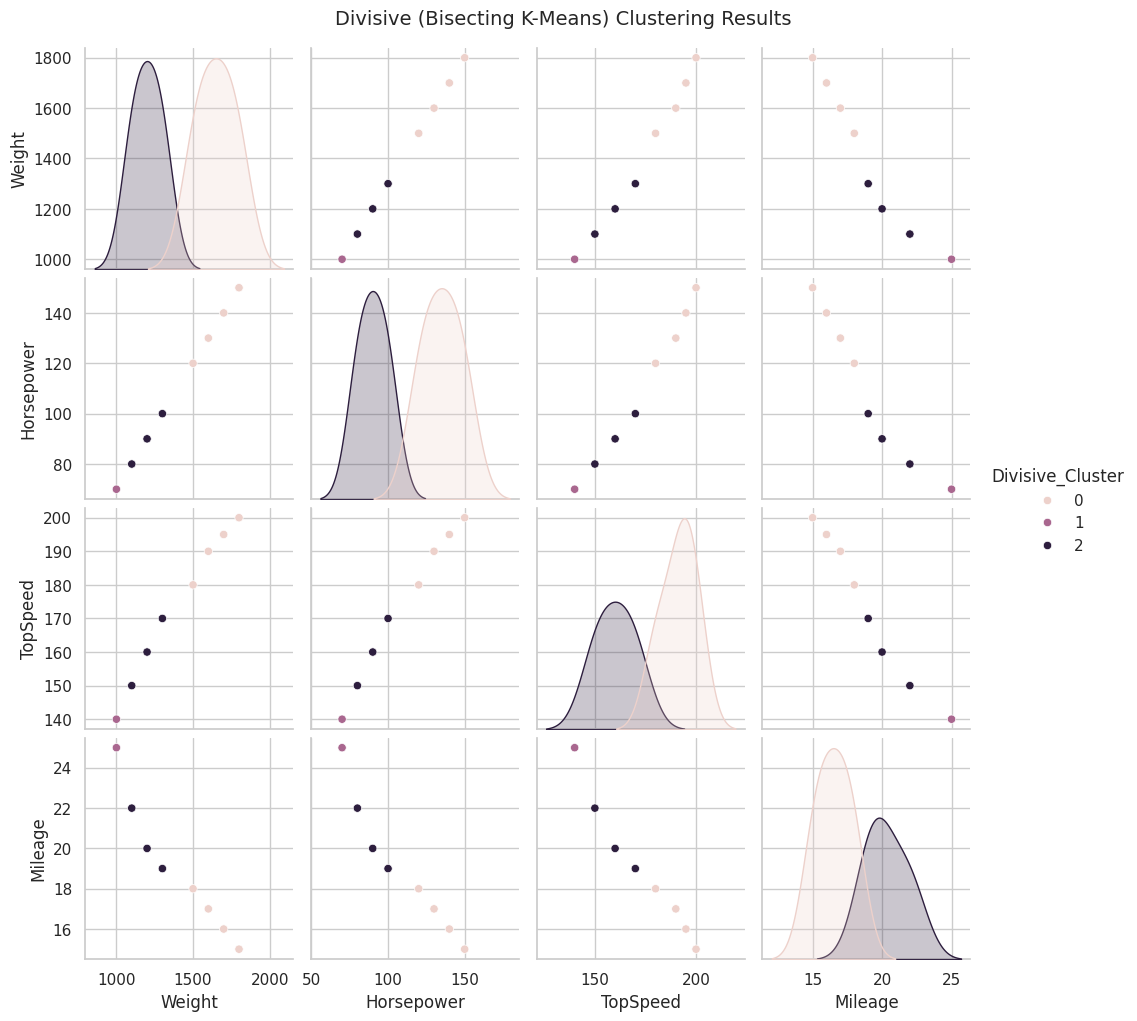

In [6]:
# Pairplot for visual comparison of clusters
sns.set(style='whitegrid', palette='deep')
sns.pairplot(df, hue='Divisive_Cluster', vars=['Weight', 'Horsepower', 'TopSpeed', 'Mileage'], diag_kind='kde')
plt.suptitle('Divisive (Bisecting K-Means) Clustering Results', y=1.02, fontsize=14)
plt.show()

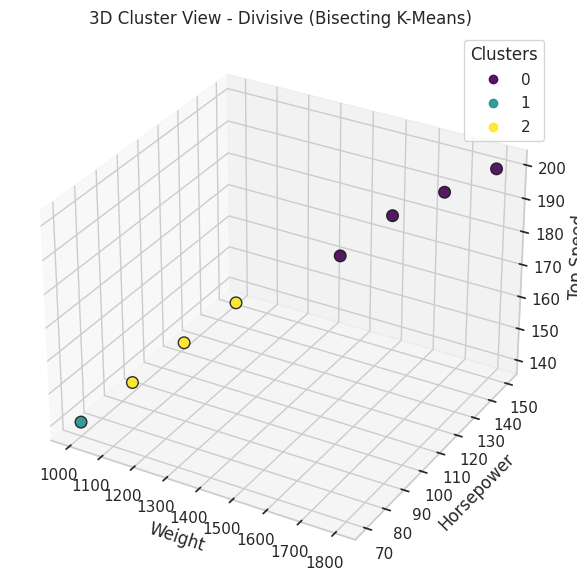

In [7]:
# 3D Visualization for Divisive Clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Weight'], df['Horsepower'], df['TopSpeed'],
                     c=df['Divisive_Cluster'], cmap='viridis', s=70, alpha=0.9, edgecolors='k')
ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Top Speed')
ax.set_title('3D Cluster View - Divisive (Bisecting K-Means)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()